In [1]:
# importing libraries
import numpy as np 
import pandas as pd 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os

from PIL import Image, ImageOps
import scipy.ndimage as ndi

In [2]:
# structure of the dataset folders
os.listdir('CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/')

['CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone', 'kidneyData.csv']

In [3]:
os.listdir('CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')

['Cyst', 'Normal', 'Stone', 'Tumor']

# Taking a look at the content of the dataset folder

In [4]:
path_main = 'CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/'
for folder in os.listdir(path_main):
    list_of_elements = os.listdir(os.path.join(path_main, folder)) 
    print(f'Folder: {folder}\n')
    print(f'Number of elements: {len(list_of_elements)}\n')
    print(f'First item\'s name: {list_of_elements[0]}\n')
    print('-----------------------------')

Folder: Cyst

Number of elements: 3709

First item's name: Cyst- (1).jpg

-----------------------------
Folder: Normal

Number of elements: 5077

First item's name: Normal- (1).jpg

-----------------------------
Folder: Stone

Number of elements: 1377

First item's name: Stone- (1).jpg

-----------------------------
Folder: Tumor

Number of elements: 2283

First item's name: Tumor- (1).jpg

-----------------------------


In [5]:
def plot_imgs(item_dir, num_imgs=25):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.title(f'{img_path}'[-10:-4])
        plt.imshow(img)

    plt.tight_layout()

In [7]:
path_normal = 'CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/'
path_stone = 'CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/'
path_cyst = 'CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/'
path_tumor = 'CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/'

## Let's take a look at some of the images

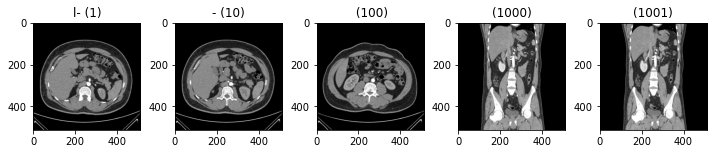

In [8]:
# Normal Kidneys
plot_imgs(path_normal, 5)

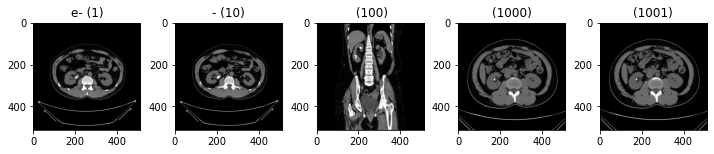

In [9]:
# Kidneys with Stones
plot_imgs(path_stone, 5)

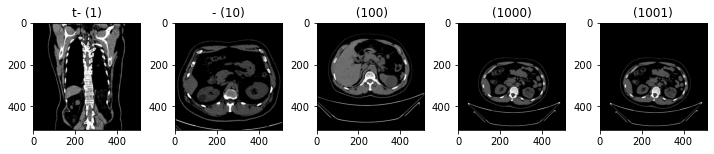

In [10]:
# Kidneys with Cysts
plot_imgs(path_cyst, 5)

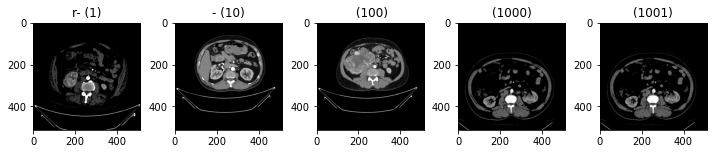

In [11]:
# Kidneys with Tumor
plot_imgs(path_tumor, 5)

## Taking a look at the csv file

In [12]:
data_kidney_path = 'CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/kidneyData.csv'
df_kidney = pd.read_csv(data_kidney_path, header=0)

In [13]:
# First 5 records

df_kidney.head()

,Unnamed: 0,image_id,path,diag,target,Class
0,0,Tumor- (1044),C:/Users/Tarun/OneDrive/Documents/College/Thir...,Tumor,3,Tumor
1,1,Tumor- (83),C:/Users/Tarun/OneDrive/Documents/College/Thir...,Tumor,3,Tumor
2,2,Tumor- (580),C:/Users/Tarun/OneDrive/Documents/College/Thir...,Tumor,3,Tumor
3,3,Tumor- (1701),C:/Users/Tarun/OneDrive/Documents/College/Thir...,Tumor,3,Tumor
4,4,Tumor- (1220),C:/Users/Tarun/OneDrive/Documents/College/Thir...,Tumor,3,Tumor


In [14]:
# Last 5 records

df_kidney.tail()

,Unnamed: 0,image_id,path,diag,target,Class
12441,12441,Cyst- (2522),C:/Users/Tarun/OneDrive/Documents/College/Thir...,Cyst,0,Cyst
12442,12442,Cyst- (2627),C:/Users/Tarun/OneDrive/Documents/College/Thir...,Cyst,0,Cyst
12443,12443,Cyst- (972),C:/Users/Tarun/OneDrive/Documents/College/Thir...,Cyst,0,Cyst
12444,12444,Cyst- (2323),C:/Users/Tarun/OneDrive/Documents/College/Thir...,Cyst,0,Cyst
12445,12445,Cyst- (2145),C:/Users/Tarun/OneDrive/Documents/College/Thir...,Cyst,0,Cyst


In [15]:
# Information about the data

df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12446 entries, 0 to 12445
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12446 non-null  int64 
 1   image_id    12446 non-null  object
 2   path        12446 non-null  object
 3   diag        12446 non-null  object
 4   target      12446 non-null  int64 
 5   Class       12446 non-null  object
dtypes: int64(2), object(4)
memory usage: 583.5+ KB


In [16]:
# The different Class objects

df_kidney['Class'].unique()

array(['Tumor', 'Normal', 'Stone', 'Cyst'], dtype=object)

### Checking the number of instances of each class

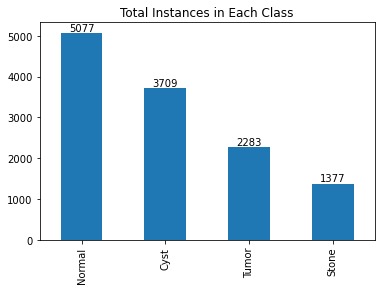

In [17]:
kidney_class_count = df_kidney['Class'].value_counts()
total_count=kidney_class_count.sum()

plot_bar = kidney_class_count.plot.bar(title='Total Instances in Each Class')
plot_bar.bar_label(plot_bar.containers[0]);

### Shapes of the Images

In [18]:
def size_imgs(item_dir, num_imgs=5):
    all_item_dirs = os.listdir(item_dir)
    if num_imgs == -1:
        item_files = [os.path.join(item_dir, file) for file in all_item_dirs]
    else:
        item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]
    img_shape_list = []
    number_sizes = {}
    
    for idx, img_path in enumerate(item_files):
        img = plt.imread(img_path)
        img_shape_list.append(img.shape)
        
    unique = list(set(img_shape_list))
    
    for item in unique:
        number_sizes[item] = img_shape_list.count(item)
    
    return number_sizes

In [ ]:
imgs_sizes_dict_normal = size_imgs(path_normal, num_imgs=-1)

elements_string_normal = list(map(str, imgs_sizes_dict_normal.keys()))

plt.figure(figsize=(5, 10))
plt.barh(elements_string_normal, imgs_sizes_dict_normal.values());
plt.title('Shapes of images in Normal folder');

In [ ]:
imgs_sizes_dict_cyst = size_imgs(path_cyst, num_imgs=-1)

elements_string_cyst = list(map(str, imgs_sizes_dict_cyst.keys()))

plt.figure(figsize=(5, 10))
plt.barh(elements_string_cyst, imgs_sizes_dict_cyst.values());
plt.title('Shapes of images in Cyst folder');

In [ ]:
imgs_sizes_dict_tumor = size_imgs(path_tumor, num_imgs=-1)

elements_string_tumor = list(map(str, imgs_sizes_dict_tumor.keys()))

plt.figure(figsize=(5, 10))
plt.barh(elements_string_tumor, imgs_sizes_dict_tumor.values());
plt.title('Shapes of images in Tumor folder');

In [ ]:
imgs_sizes_dict_stone = size_imgs(path_stone, num_imgs=-1)

elements_string_stone = list(map(str, imgs_sizes_dict_stone.keys()))

plt.figure(figsize=(5, 10))
plt.barh(elements_string_stone, imgs_sizes_dict_stone.values());
plt.title('Shapes of images in Stone folder');

As we can see, most of the images have the shape (512,512,3). 

### Resizing all the images

In [ ]:
for filename in os.listdir(path_normal):
    with Image.open(os.path.join(path_normal, filename)) as im:
        im = im.resize((512, 512))
        im.save(os.path.join(path_normal, filename))

In [ ]:
for filename in os.listdir(path_cyst):
    with Image.open(os.path.join(path_cyst, filename)) as im:
        im = im.resize((512, 512))
        im.save(os.path.join(path_cyst, filename))

In [ ]:
for filename in os.listdir(path_stone):
    with Image.open(os.path.join(path_stone, filename)) as im:
        im = im.resize((512, 512))
        im.save(os.path.join(path_stone, filename))

In [ ]:
for filename in os.listdir(path_tumor):
    with Image.open(os.path.join(path_tumor, filename)) as im:
        im = im.resize((512, 512))
        im.save(os.path.join(path_tumor, filename))

### Checking whether all the images are resized

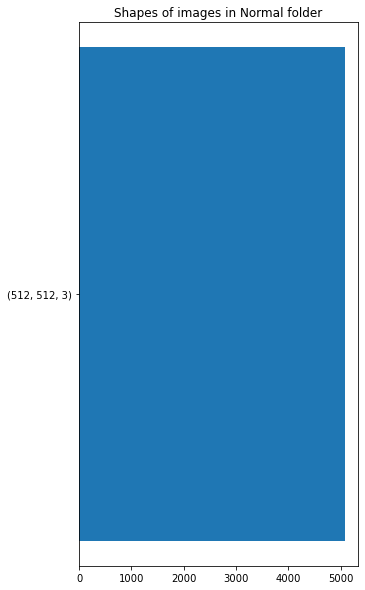

In [21]:
imgs_sizes_dict_normal = size_imgs(path_normal, num_imgs=-1)

elements_string_normal = list(map(str, imgs_sizes_dict_normal.keys()))

plt.figure(figsize=(5, 10))
plt.barh(elements_string_normal, imgs_sizes_dict_normal.values());
plt.title('Shapes of images in Normal folder');

## Checking whether there are any missing values in the dataset

In [24]:
if df_kidney.isna().any().any():
    print("There are missing values.")
else:
    print("There are no missing values.")

There are no missing values.


## Displaying Images of First 5 Rows

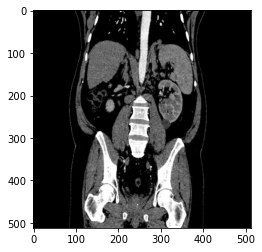

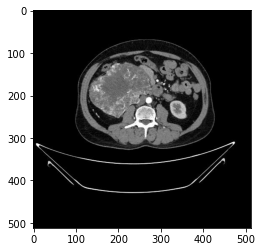

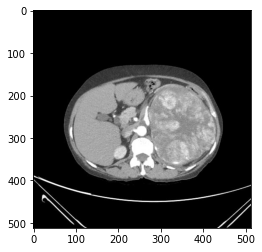

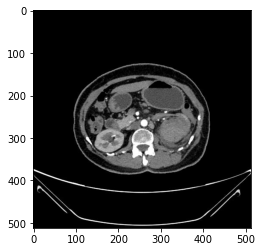

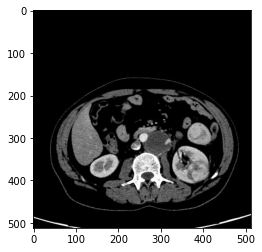

In [25]:
for i, row in df_kidney.head(5).iterrows():
    with Image.open(row["path"]) as im:
        im_array = np.array(im)
        plt.imshow(im_array)
        plt.show()